In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import LabelEncoder


import time
import os
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [3]:
parent_folder = os.path.dirname(os.getcwd())

In [4]:
aviation_data_path = os.path.join(
    parent_folder, 'data', 'encoded_aviation_data_3.csv')

df = pd.read_csv(aviation_data_path, encoding='latin-1')

In [5]:
df.head()

,Unnamed: 0,target,location,aircraft_damage,make,model,number_of_engines,engine_type,weather_conditions,phase_of_flight,Year,Month,Day,injuries,pax_onboard,fatality_percentage,survived,amateur_built
0,0,1,1725,0,2962,975,1.0,0,2,1,1982,6,13,1.0,1.0,0.0,1,0
1,1,1,7690,0,2962,3850,1.0,0,2,2,1982,7,1,2.0,2.0,0.0,2,1
2,2,0,4220,0,2962,6614,1.0,0,2,0,1982,7,16,1.0,1.0,100.0,0,1
3,3,1,12732,0,2962,4232,1.0,0,2,6,1982,8,21,0.0,1.0,0.0,1,1
4,4,1,11329,2,2962,5814,1.0,0,2,5,1982,8,24,0.0,1.0,0.0,1,1


In [6]:
df.columns

Index(['Unnamed: 0', 'target', 'location', 'aircraft_damage', 'make', 'model',
       'number_of_engines', 'engine_type', 'weather_conditions',
       'phase_of_flight', 'Year', 'Month', 'Day', 'injuries', 'pax_onboard',
       'fatality_percentage', 'survived', 'amateur_built'],
      dtype='object')

In [7]:
df = df.drop('Unnamed: 0', axis =1)
df.shape

(48661, 17)

In [8]:
df.head()

,target,location,aircraft_damage,make,model,number_of_engines,engine_type,weather_conditions,phase_of_flight,Year,Month,Day,injuries,pax_onboard,fatality_percentage,survived,amateur_built
0,1,1725,0,2962,975,1.0,0,2,1,1982,6,13,1.0,1.0,0.0,1,0
1,1,7690,0,2962,3850,1.0,0,2,2,1982,7,1,2.0,2.0,0.0,2,1
2,0,4220,0,2962,6614,1.0,0,2,0,1982,7,16,1.0,1.0,100.0,0,1
3,1,12732,0,2962,4232,1.0,0,2,6,1982,8,21,0.0,1.0,0.0,1,1
4,1,11329,2,2962,5814,1.0,0,2,5,1982,8,24,0.0,1.0,0.0,1,1


## Spilt the data

In [9]:
# Split the predictor and target variables
y = df['target']
X = df.drop('target', axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
X_train['make']

34165    1986
18388     500
37224    2203
12678     500
3777      236
         ... 
11284     500
44732    2336
38158    2203
860        42
15795     500
Name: make, Length: 36495, dtype: int64

## Standardize data

In [11]:
# Select the columns in the training set that have a datatype of 'object' (categorical data)
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Create a new DataFrame with just the categorical data from the training set
categorical_data = X_train[categorical_columns]

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Use the LabelEncoder to transform the categorical data into numerical data
# The transformation is done by assigning each unique category in a column a unique integer
encoded_categorical_data = categorical_data.apply(label_encoder.fit_transform)

# Concatenate the original training set with the newly encoded categorical data
# This results in a DataFrame with both the original and encoded categorical data
X_train_encoded = pd.concat([X_train, encoded_categorical_data], axis=1)

# Select only the columns in the DataFrame that are not of type 'object'
# This effectively removes the original categorical data, leaving only the encoded data
X_train_encoded = X_train_encoded.select_dtypes(exclude=['object'])

# Replace the original training set with the encoded training set
X_train = X_train_encoded

In [12]:
X_train.head()

,location,aircraft_damage,make,model,number_of_engines,engine_type,weather_conditions,phase_of_flight,Year,Month,Day,injuries,pax_onboard,fatality_percentage,survived,amateur_built,0
34165,10902,0,1986,4128,1.0,0,2,6,1989,3,26,4.0,4.0,100.0,0,0,NaN
18388,5707,2,500,139,1.0,0,2,5,1988,12,22,0.0,1.0,0.0,1,0,NaN
37224,10152,2,2203,4616,1.0,0,2,5,1997,6,28,0.0,1.0,0.0,1,0,NaN
12678,1263,2,500,131,1.0,0,2,9,1994,2,6,1.0,1.0,0.0,1,0,NaN
3777,8281,2,236,694,1.0,0,2,9,1989,10,1,0.0,2.0,0.0,2,0,NaN


In [13]:
# Select the columns in the training set that have a datatype of 'object' (categorical data)
categorical_columns = X_test.select_dtypes(include=['object']).columns

# Create a new DataFrame with just the categorical data from the training set
categorical_data = X_test[categorical_columns]

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Use the LabelEncoder to transform the categorical data into numerical data
# The transformation is done by assigning each unique category in a column a unique integer
encoded_categorical_data = categorical_data.apply(label_encoder.fit_transform)

# Concatenate the original training set with the newly encoded categorical data
# This results in a DataFrame with both the original and encoded categorical data
X_test_encoded = pd.concat([X_test, encoded_categorical_data], axis=1)

# Select only the columns in the DataFrame that are not of type 'object'
# This effectively removes the original categorical data, leaving only the encoded data
X_test_encoded = X_test_encoded.select_dtypes(exclude=['object'])

# Replace the original training set with the encoded training set
X_test = X_test_encoded

In [14]:
X_test.head()

,location,aircraft_damage,make,model,number_of_engines,engine_type,weather_conditions,phase_of_flight,Year,Month,Day,injuries,pax_onboard,fatality_percentage,survived,amateur_built,0
24742,1913,0,500,288,1.0,0,2,9,1984,12,26,1.0,2.0,0.0,2,0,NaN
25300,636,2,500,289,1.0,0,2,2,1987,5,29,3.0,3.0,0.0,3,0,NaN
16214,5829,0,500,176,1.0,0,2,6,1983,5,6,1.0,1.0,100.0,0,0,NaN
41266,1061,2,2203,4616,1.0,0,2,5,1995,6,3,0.0,2.0,0.0,2,0,NaN
23413,6338,2,500,212,1.0,0,2,9,1991,9,29,1.0,2.0,0.0,2,0,NaN


In [15]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)

scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)

scaled_df_train.head()

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

# Create a helper function to pass different models

In [ ]:
def evaluate(model, name):
    
    output = {'model': name}
    start1 = time.time()
    model.fit(X_train, y_train)
    traintime = time.time() - start1
    
    # training metrics
    
    trainpred = model.predict(X_train)
    output['train_precision'] = precision_score(y_train, trainpred)
    output['train_recall'] = recall_score(y_train, trainpred)
    output['train_accuracy'] = accuracy_score(y_train, trainpred)
    output['train_f1'] = f1_score(y_train, trainpred)
    output['train_time'] = traintime
    
    # testing metrics
    
    start2 = time.time()
    pred = model.predict(X_test)
    testtime = time.time() - start2
    
    output['test_precision'] = precision_score(y_test, pred)
    output['test_recall'] = recall_score(y_test, pred)
    output['test_accuracy'] = accuracy_score(y_test, pred)
    output['test_f1'] = f1_score(y_test, pred)
    output['test_time'] = testtime
    
    # confusion matrix for test set
    
    conf = pd.crosstab(y_test, pred)
    
    return output, conf

In [ ]:
y_train.head()

34165    0
18388    1
37224    1
12678    1
3777     1
Name: target, dtype: int64

In [ ]:
y_test.head()

24742    1
25300    1
16214    0
41266    1
23413    1
Name: target, dtype: int64

## 1. K Nearest Neighbors

In [ ]:
# find optimal k 
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 11
F1-Score: 0.9108654424348951


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_results = evaluate(knn, 'knn')

In [ ]:
# results
knn_results[0]

{'model': 'knn',
 'train_precision': 1.0,
 'train_recall': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0,
 'train_time': 0.0144805908203125,
 'test_precision': 0.8938535982703593,
 'test_recall': 0.8775015160703457,
 'test_accuracy': 0.8156337333552524,
 'test_f1': 0.8856020808894782,
 'test_time': 4.075603008270264}

In [ ]:
# confusion matrix
knn_results[1]

col_0,0,1
target,,
0,1241,1031
1,1212,8682


## 2. Logistic Regression

In [ ]:
lr = LogisticRegression(random_state = 0, max_iter=50000)
lr_results = evaluate(lr, 'logistic_regression')

In [ ]:
# results
lr_results[0]

{'model': 'logistic_regression',
 'train_precision': 0.9989204142910159,
 'train_recall': 0.9997298848634231,
 'train_accuracy': 0.9989039594464996,
 'train_f1': 0.9993249856559452,
 'train_time': 8.946526288986206,
 'test_precision': 0.9993936331480546,
 'test_recall': 0.999494643218112,
 'test_accuracy': 0.9990958408679927,
 'test_f1': 0.9994441356309062,
 'test_time': 0.005559444427490234}

In [ ]:
# confusion matrix
lr_results[1]

col_0,0,1
target,,
0,2266,6
1,5,9889


## 3. Trees

### a. Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt_results = evaluate(dt, 'decision_tree')

In [ ]:
dt_results[0]

{'model': 'decision_tree',
 'train_precision': 1.0,
 'train_recall': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0,
 'train_time': 0.06181597709655762,
 'test_precision': 0.9997977959761399,
 'test_recall': 0.999494643218112,
 'test_accuracy': 0.9994246260069045,
 'test_f1': 0.9996461966135961,
 'test_time': 0.0}

In [ ]:
dt_results[1]

col_0,0,1
target,,
0,2270,2
1,5,9889


### b. Random Forest

In [ ]:
rf = RandomForestClassifier()
rf_results = evaluate(rf, 'random_forest')

In [ ]:
rf_results[0]

{'model': 'random_forest',
 'train_precision': 1.0,
 'train_recall': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0,
 'train_time': 2.147618293762207,
 'test_precision': 1.0,
 'test_recall': 0.999494643218112,
 'test_accuracy': 0.9995890185763604,
 'test_f1': 0.99974725774655,
 'test_time': 0.09991836547851562}

In [ ]:
rf_results[1]

col_0,0,1
target,,
0,2272,0
1,5,9889


## 4. Naive Bayes

In [ ]:
nv = MultinomialNB()
nv_results = evaluate(nv, 'naive_bayes')

In [ ]:
nv_results[0]

{'model': 'naive_bayes',
 'train_precision': 0.989001099890011,
 'train_recall': 0.6679272039706925,
 'train_accuracy': 0.724482805863817,
 'train_f1': 0.797355851589109,
 'train_time': 0.017972946166992188,
 'test_precision': 0.9913273909901229,
 'test_recall': 0.8318172629876693,
 'test_accuracy': 0.857307249712313,
 'test_f1': 0.9045944163552428,
 'test_time': 0.007131099700927734}

In [ ]:
nv_results[1]

col_0,0,1
target,,
0,2200,72
1,1664,8230


## 5. Boosting

### a. AdaBoost

In [ ]:
ada = AdaBoostClassifier()
ada_results = evaluate(ada, 'adaboost')

In [ ]:
ada_results[0]

{'model': 'adaboost',
 'train_precision': 1.0,
 'train_recall': 1.0,
 'train_accuracy': 1.0,
 'train_f1': 1.0,
 'train_time': 2.160045623779297,
 'test_precision': 0.9998988877654196,
 'test_recall': 0.999494643218112,
 'test_accuracy': 0.9995068222916325,
 'test_f1': 0.9996967246259604,
 'test_time': 0.10803866386413574}

In [ ]:
ada_results[1]

col_0,0,1
target,,
0,2271,1
1,5,9889


### b. Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb_results = evaluate(gb, 'gradient_boosting')

In [ ]:
gb_results[0]

{'model': 'gradient_boosting',
 'train_precision': 1.0,
 'train_recall': 0.9999324712158557,
 'train_accuracy': 0.999945197972325,
 'train_f1': 0.9999662344678552,
 'train_time': 6.795574903488159,
 'test_precision': 1.0,
 'test_recall': 0.999494643218112,
 'test_accuracy': 0.9995890185763604,
 'test_f1': 0.99974725774655,
 'test_time': 0.024858951568603516}

In [ ]:
gb_results[1]

col_0,0,1
target,,
0,2272,0
1,5,9889


# Results Summary

In [ ]:
result_dicts = [knn_results, lr_results, dt_results, 
                rf_results, nv_results, ada_results, gb_results]
results = pd.DataFrame([i[0] for i in result_dicts])

In [ ]:
results

,model,train_precision,train_recall,train_accuracy,train_f1,train_time,test_precision,test_recall,test_accuracy,test_f1,test_time
0,knn,1.000000,1.000000,1.000000,1.000000,0.014481,0.893854,0.877502,0.815634,0.885602,4.075603
1,logistic_regression,0.998920,0.999730,0.998904,0.999325,8.946526,0.999394,0.999495,0.999096,0.999444,0.005559
2,decision_tree,1.000000,1.000000,1.000000,1.000000,0.061816,0.999798,0.999495,0.999425,0.999646,0.000000
3,random_forest,1.000000,1.000000,1.000000,1.000000,2.147618,1.000000,0.999495,0.999589,0.999747,0.099918
4,naive_bayes,0.989001,0.667927,0.724483,0.797356,0.017973,0.991327,0.831817,0.857307,0.904594,0.007131
5,adaboost,1.000000,1.000000,1.000000,1.000000,2.160046,0.999899,0.999495,0.999507,0.999697,0.108039
6,gradient_boosting,1.000000,0.999932,0.999945,0.999966,6.795575,1.000000,0.999495,0.999589,0.999747,0.024859


# Final Model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import numpy as np

In [ ]:
rf_clf = RandomForestClassifier()

mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 99.97%


## Build Random Forest Model with hyperparameters

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
rf_Model = RandomForestClassifier()


In [ ]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
rf_Grid.best_params_


{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 64}

In [ ]:
print(f"Training Accuracy: {rf_Grid.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_Grid.best_params_}")

Training Accuracy: 99.98%

Optimal Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 64}


In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')

print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 1.000


# RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid,cv = 10, verbose=2, n_jobs = 4 )

In [ ]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [ ]:
rf_RandomGrid.best_params_

{'n_estimators': 64,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [ ]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')

print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 1.000


# Show final Random Forest 

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})

import matplotlib.pyplot as plt

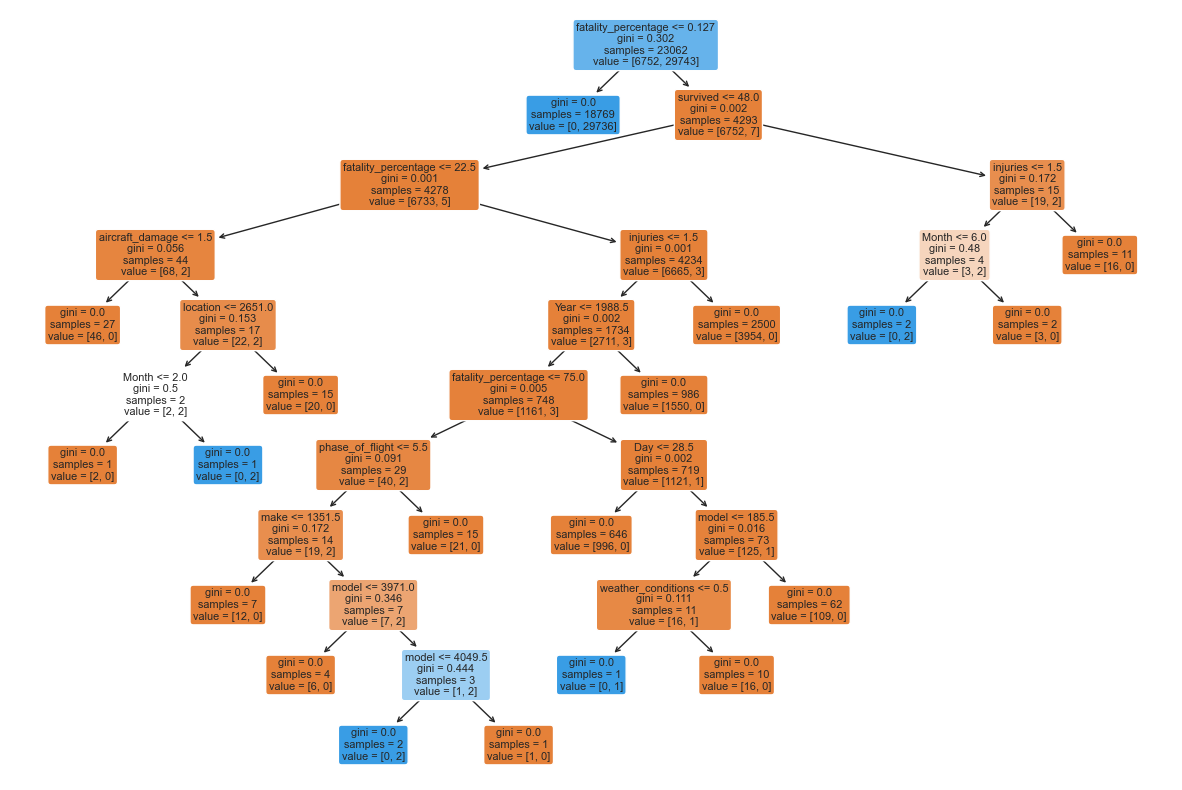

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0],
          feature_names=X_train.columns,
          class_names=None,
          filled=True, impurity=True,
          rounded=True)

fig_path = os.path.join(
    parent_folder, 'imgs', 'rf_tree.png')

fig.savefig(fig_path)

# Inspecting feature importance

In [ ]:
importances = rf.feature_importances_

x = pd.DataFrame(sorted(list(zip(rf.feature_importances_, X_train.columns))))
x

,0,1
0,0.000197,number_of_engines
1,0.000266,make
2,0.000276,Month
3,0.000292,engine_type
4,0.000359,Day
5,0.000369,amateur_built
6,0.000539,Year
7,0.000549,location
8,0.001409,model
9,0.003290,phase_of_flight


In [ ]:
feature_names = X_train.columns

In [ ]:
forest_importances = pd.Series(importances, index=feature_names)


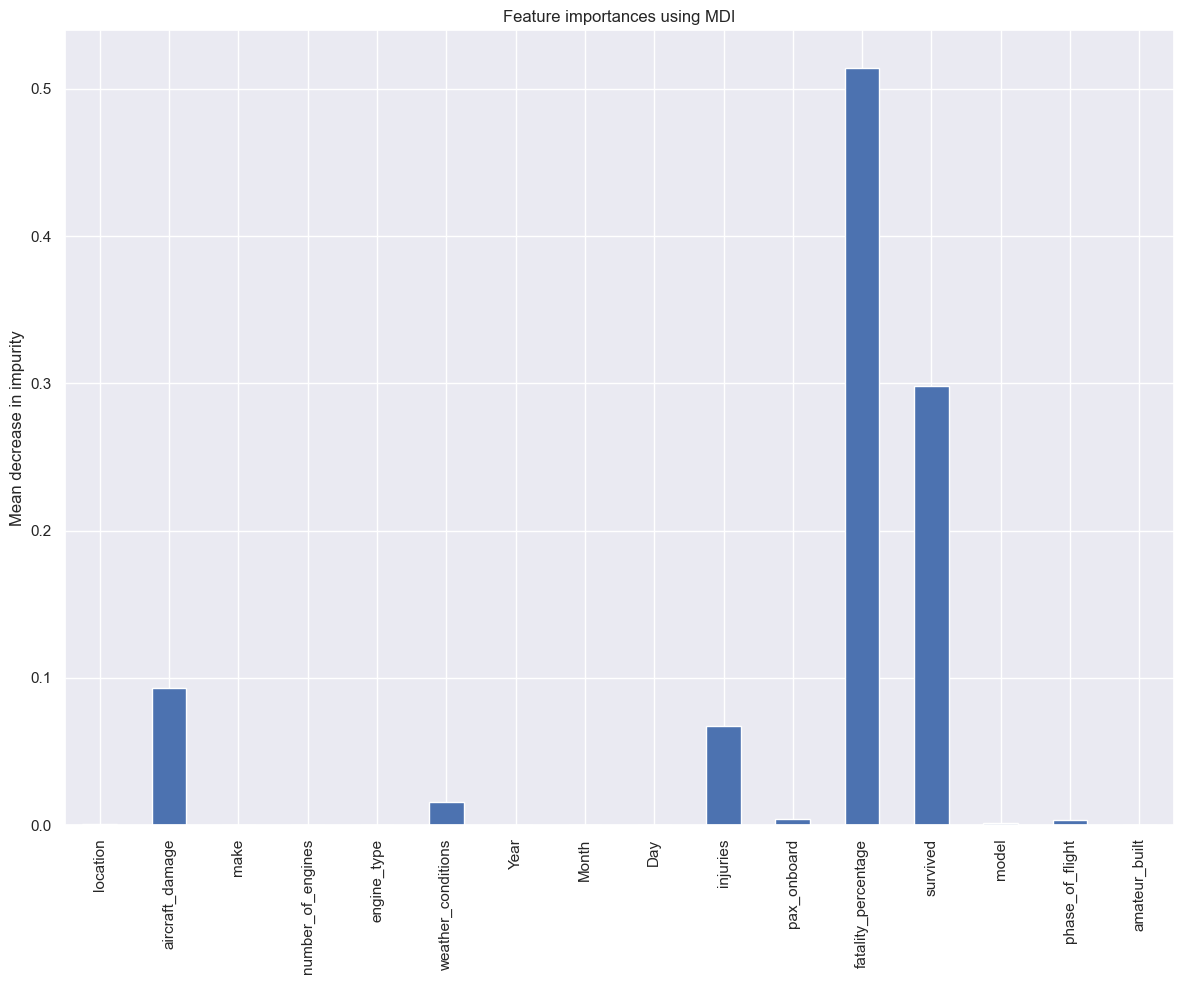

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

fig_path = os.path.join(
    parent_folder, 'imgs', 'rf_tree.png')

fig.savefig(fig_path)

# fig.savefig('/Users/robertreynoso/Desktop/phase_03_project/imgs/rf_feauture_imp.png')

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances_2 = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 25.892 seconds


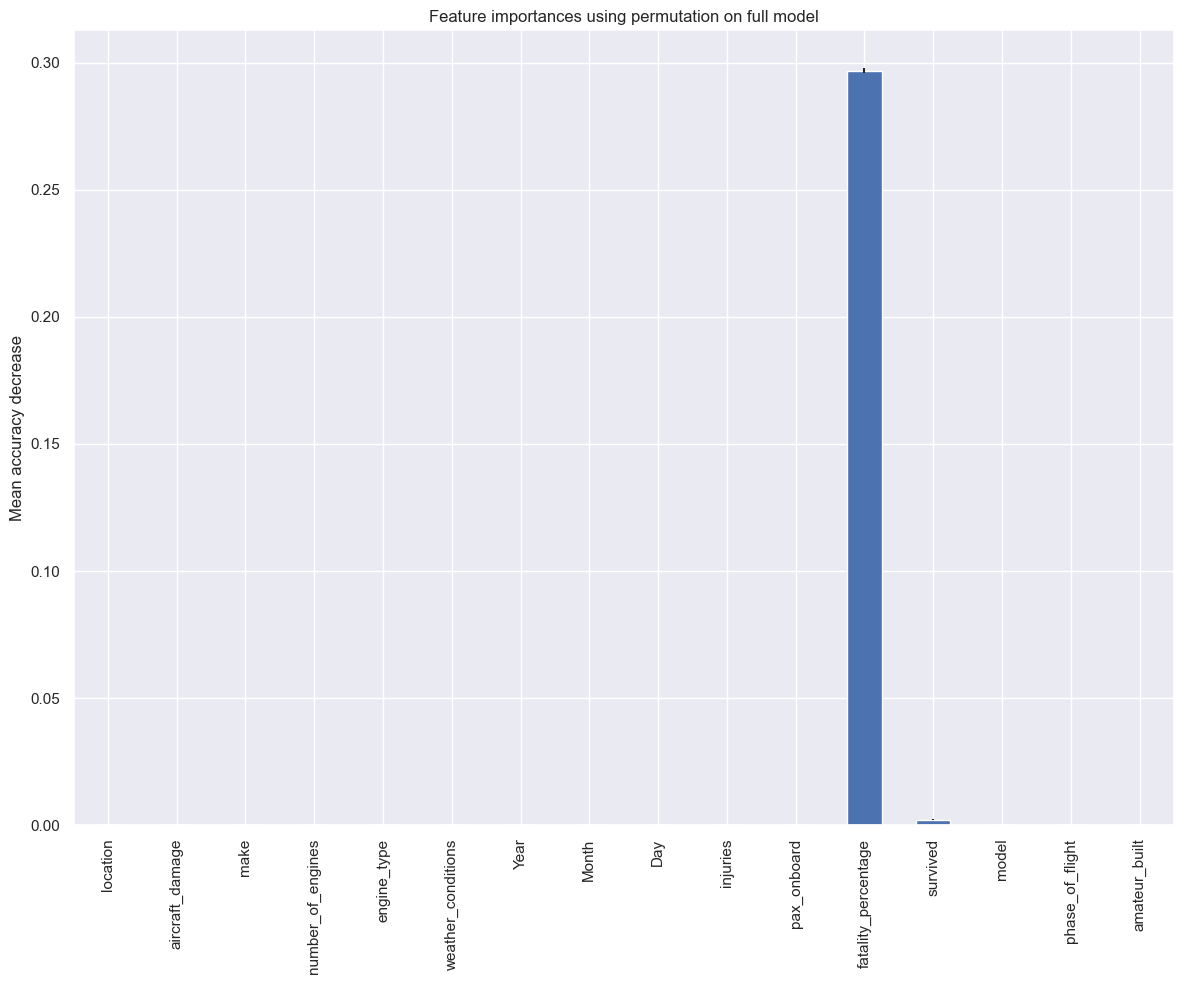

In [ ]:
fig, ax = plt.subplots()
forest_importances_2.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

fig_path = os.path.join(
    parent_folder, 'imgs', 'rf_feauture_imp_perm.png')

fig.savefig(fig_path)

# Visualize Confusion Matrix for X_train, X_test

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# y_pred_test = model.predict(X_test)

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
# from sklearn.metrics import plot_confusion_matrix

from mlxtend.plotting import plot_confusion_matrix


# Visualize your confusion matrix
plot_confusion_matrix(rf, X_test, y_test,
                     cmap=plt.cm.Blues)

# Add labels to the plot
class_names = ['fatal', 'non-fatal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')

plt.show()

fig_path = os.path.join(
    parent_folder, 'imgs', 'rf_confus_matrix.png')

plt.savefig(fig_path)

AttributeError: 'RandomForestClassifier' object has no attribute 'sum'

In [ ]:
rf_results[1]

col_0,0,1
target,,
0,2272,0
1,5,9889


In [ ]:
# from sklearn.metrics import plot_confusion_matrix

from mlxtend.plotting import plot_confusion_matrix

# Visualize your confusion matrix
plot_confusion_matrix(rf, X_train, y_train,
                     cmap=plt.cm.Blues)

# Add labels to the plot
class_names = ['fatal', 'non-fatal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')

plt.show()



plt.savefig('/Users/robertreynoso/Desktop/phase_03_project/imgs/train_rf_confus_matrix.png')

In [ ]:
best_params = rf_Grid.best_params_

In [ ]:
best_rf = RandomForestClassifier(**best_params)

best_rf.fit(X_train, y_train)

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=4, max_features='auto',
                       n_estimators=64)

In [ ]:
X_test.head()

,location,aircraft_damage,make,number_of_engines,engine_type,weather_conditions,Year,Month,Day,injuries,pax_onboard,fatality_percentage,survived,model,phase_of_flight,amateur_built
24742,1913,0,500,1,0,2,1984,12,26,1.0,2.0,0.0,2,172,9,0
25300,636,2,500,1,0,2,1987,5,29,3.0,3.0,0.0,3,173,2,0
16214,5829,0,500,1,0,2,1983,5,6,1.0,1.0,100.0,0,103,6,0
41266,1061,2,2203,1,0,2,1995,6,3,0.0,2.0,0.0,2,2016,5,0
23413,6338,2,500,1,0,2,1991,9,29,1.0,2.0,0.0,2,124,9,0


In [ ]:
predictions = best_rf.predict(X_test)
predictions

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [ ]:
predict = best_rf.predict(X_test.iloc[2].values.reshape(1, -1))
predict[0]

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0

In [ ]:
import pickle

model_path = os.path.join(
    parent_folder, 'models', 'model.pkl')

In [ ]:
# Save the model to a file
with open(model_path, 'wb') as file:
    pickle.dump(best_rf, file)

In [ ]:
# Load the model from a file
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
X_test.iloc[1].values.reshape(1, -1)

array([[6.360e+02, 2.000e+00, 5.000e+02, 1.000e+00, 0.000e+00, 2.000e+00,
        1.987e+03, 5.000e+00, 2.900e+01, 3.000e+00, 3.000e+00, 0.000e+00,
        3.000e+00, 1.730e+02, 2.000e+00, 0.000e+00]])

In [ ]:
data = X_test.iloc[1].values.reshape(1, -1)
df = pd.DataFrame(data, columns=X_test.columns)
df


,location,aircraft_damage,make,number_of_engines,engine_type,weather_conditions,Year,Month,Day,injuries,pax_onboard,fatality_percentage,survived,model,phase_of_flight,amateur_built
0,636.0,2.0,500.0,1.0,0.0,2.0,1987.0,5.0,29.0,3.0,3.0,0.0,3.0,173.0,2.0,0.0


In [ ]:
df.columns

Index(['location', 'aircraft_damage', 'make', 'number_of_engines',
       'engine_type', 'weather_conditions', 'Year', 'Month', 'Day', 'injuries',
       'pax_onboard', 'fatality_percentage', 'survived', 'model',
       'phase_of_flight', 'amateur_built'],
      dtype='object')

In [18]:
print(list(X_test.iloc[1].values.reshape(1, -1)[0]))

[636.0, 2.0, 500.0, 289.0, 1.0, 0.0, 2.0, 2.0, 1987.0, 5.0, 29.0, 3.0, 3.0, 0.0, 3.0, 0.0, nan]


In [21]:
prediction = loaded_model.predict(X_test.iloc[1].values.reshape(1, -1))
prediction[0]

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1